# Guía 4 ejercicio 11

## Samantha Kucher

## a)

La probabilidad conjunta de que las posiciones iniciales esféricas estén en un entorno de $dV$ es proporcional a $\rho dV$:   
   

$P(r<\boldsymbol{r}<r+dr, \theta<\boldsymbol{\theta}<\theta+d\theta, \varphi<\boldsymbol{\varphi}<\varphi+d\varphi) = f(r, \theta, \varphi)drd\theta d\varphi \propto \rho (r) dV = \rho(r) r^2 \sin(\theta) dr d\theta d\varphi$
   
   
Reemplazo $\rho (r) =  \frac{\rho_0}{1+( \frac{r}{r_e} ) ^2}$ y expreso esta proporcionalidad con un factor $A$, que calcularé por normalización:   
   

$f(r, \theta, \varphi)drd\theta d\varphi = A \frac{\rho_0}{1+( \frac{r}{r_e} ) ^2} r^2 \sin(\theta) dr d\theta d\varphi$
    
   

$ 1 = \int f(r, \theta, \varphi)drd\theta d\varphi = \int_0^{2\pi} \int_0^\pi \int_0^{r_e} A \frac{\rho_0}{1+( \frac{r}{r_e} ) ^2} r^2 \sin(\theta) dr d\theta d\varphi = A \rho_0 (4-\pi)\pi r_e^3$
   
   

$\Rightarrow A = \frac{1}{\rho_0 (4-\pi)\pi r_e^3} \qquad \mathrm{y} \qquad f(r, \theta, \varphi) = \frac{r^2 \sin(\theta)}{(\rho_0 (4-\pi)\pi r_e^3)[1+( \frac{r}{r_e} ) ^2]}$

 

## b)

Marginalizo para obtener las densidades de probabilidad de cada coordenada de la posición inicial:   
   

$f_1(r) = \int_0^{2\pi} \int_0^\pi  f(r, \theta, \varphi)d\theta d\varphi = \int_0^{2\pi} \int_0^\pi \frac{r^2 \sin(\theta)}{(\rho_0 (4-\pi)\pi r_e^3)[1+( \frac{r}{r_e} ) ^2]} d\theta d\varphi = \frac{r^2}{r_e^3(1-\frac{\pi}{4})(1+(\frac{r}{r_e}^2)}$
 
   

$f_2(\theta) = \int_0^{2\pi} \int_0^{r_e} f(r, \theta, \varphi) dr d\varphi = \int_0^{2\pi} \int_0^{r_e} \frac{r^2 \sin(\theta)}{(\rho_0 (4-\pi)\pi r_e^3)[1+( \frac{r}{r_e} ) ^2]} dr d\varphi = \frac{\sin(\theta)}{2}$
 
   

$f_3(\varphi) = \int_0^\pi \int_0^{r_e} f(r, \theta, \varphi) dr d\theta = \int_0^\pi \int_0^{r_e} \frac{r^2 \sin(\theta)}{(\rho_0 (4-\pi)\pi r_e^3)[1+( \frac{r}{r_e} ) ^2]} dr d\theta = \frac{1}{2\pi}$
    
    
Todas las densidades de probabilidad obtenidas están correctamente normalizadas, es decir, verifican 

$\int f_1(r) dr =1 \qquad \int f_2(\theta) d\theta =1 \qquad \int f_3(\varphi) d\varphi =1$
   
   
Para ver si son independientes, me fijo si $f(r, \theta, \varphi) = f_1(r) f_2(\theta) f_3(\varphi)$. Como esta igualdad efectivamente se cumple, las distribuciones de probabilidad son independientes.


## c)

In [2]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from datetime import datetime
rd.seed(datetime.now())
%matplotlib inline

Defino una función que aplica el método Monte Carlo:

In [3]:
M = 10000 #cantidad de numeros que quiero generar
def montecarlo(a,b, f, fmax):
    aceptados =[]
    for i in range(0,5*M): #pongo hasta 5M para asegurarme de llegar a generar M
        y, z = rd.random(), rd.random()
        u,v = a+(b-a)*y, fmax*z
        if v<=f(u): 
            aceptados.append(u)
        if len(aceptados)==M: #cuando haya generados M numeros, ya esta
            break
    return aceptados

Defino las densidades de probabilidad y genero los valores de cada variable utilizando la función anterior.

In [4]:
re = 1 #tomamos el radio de la esfera igual a 1
def fr(r):
    return (r**2)/((re**3)*(1-np.pi/4)*(1+(r/re)**2))

def ftita(tita):
    return (np.sin(tita))/2

def ffi(fi):
    return 1/(2*np.pi) +fi-fi 

generadosr = montecarlo(0.00, re, fr, 1/(re*(1-np.pi/4)))
generadostita = montecarlo(0.00, np.pi, ftita, 0.5)
generadosfi = montecarlo(0.00, 2*np.pi, ffi, 1/(2*np.pi))

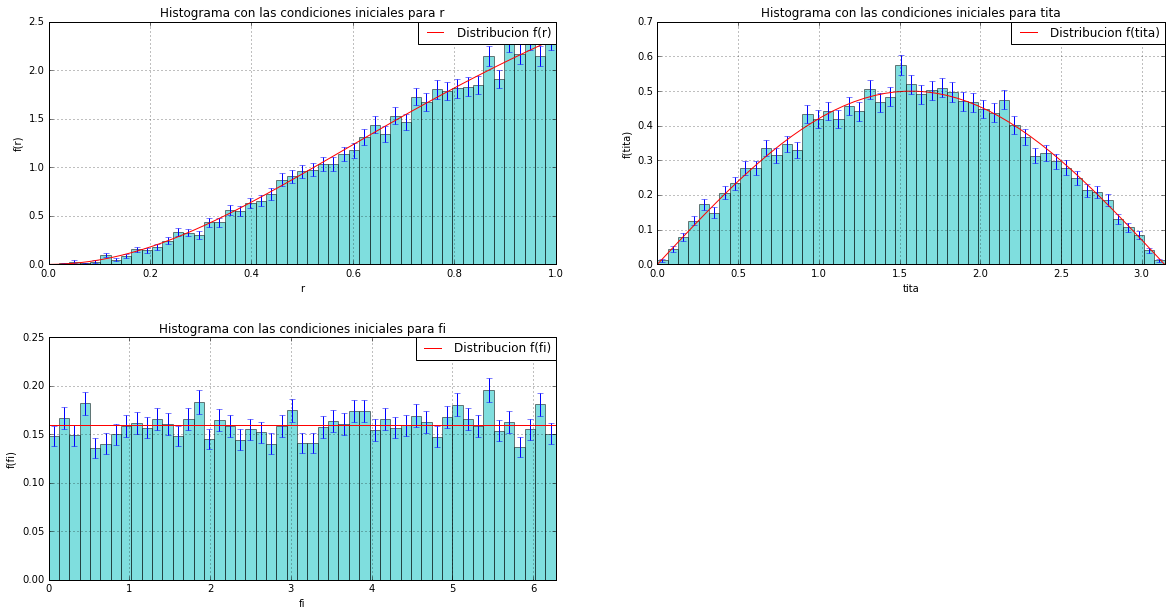

In [5]:
#Graficos
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
fig.subplots_adjust(hspace=0.3)
bines = 50

binesr = np.linspace(0,re,bines)
numero1, bins1 = np.histogram(generadosr, bins = binesr) #numero=numero de entradas por bin
error1 = np.sqrt(numero1) / (np.diff(bins1) * np.sum(numero1)) #error poissoniano
numero1 = numero1 / (np.diff(bins1) * np.sum(numero1)) #Normalizo a 1
ax1.bar(bins1[:-1], numero1, width = np.diff(bins1), yerr = error1, ecolor="b", color='c', alpha=0.5)
ax1.plot(binesr,fr(binesr), 'r-', label = 'Distribucion f(r)')
ax1.set_xlim([0,re])
ax1.set_xlabel('r')
ax1.set_ylabel('f(r)')
ax1.set_title('Histograma con las condiciones iniciales para r')
ax1.legend(loc=1, borderaxespad=0.)
ax1.grid()

binestita = np.linspace(0,np.pi,bines)
numero2, bins2 = np.histogram(generadostita, bins = binestita) 
error2 = np.sqrt(numero2) / (np.diff(bins2) * np.sum(numero2)) 
numero2 = numero2 / (np.diff(bins2) * np.sum(numero2)) 
ax2.bar(bins2[:-1], numero2, width = np.diff(bins2), yerr = error2, ecolor="b", color='c', alpha=0.5)
ax2.plot(binestita,ftita(binestita), 'r-', label = 'Distribucion f(tita)')
ax2.set_xlim([0,np.pi])
ax2.set_xlabel('tita')
ax2.set_ylabel('f(tita)')
ax2.set_title('Histograma con las condiciones iniciales para tita')
ax2.legend(loc=1, borderaxespad=0.)
ax2.grid()

binesfi = np.linspace(0,2*np.pi,bines)
numero3, bins3 = np.histogram(generadosfi, bins = binesfi) 
error3 = np.sqrt(numero3) / (np.diff(bins3) * np.sum(numero3)) 
numero3 = numero3 / (np.diff(bins3) * np.sum(numero3)) 
ax3.bar(bins3[:-1], numero3, width = np.diff(bins3), yerr = error3, ecolor="b", color='c', alpha=0.5)
ax3.plot(binesfi,ffi(binesfi), 'r-', label = 'Distribucion f(fi)')
ax3.set_xlim([0,2*np.pi])
ax3.set_xlabel('fi')
ax3.set_ylabel('f(fi)')
ax3.set_title('Histograma con las condiciones iniciales para fi')
ax3.legend(loc=1, borderaxespad=0.)
ax3.grid()